In [1]:
import csv
import numpy as np
import matplotlib.pyplot as plt

def test_knn(train_x, train_y, test_x, num_nn):
  
    """
    @param train_x: a (num_train, num_dims) data matrix contianing all training points
    @param train_y: (num_train,) label vector containing the labels of train_x values
    @param test_x: (num_test, num_dims) data matrix containing all the test points for
    which the label has to be predicted
    @param num_nn: the value of k where k is the number of nearest neighbors
     
    returns pred_y where pred_y is a (num_test,) predicted label array
    """
    pred_y = [] 
    #for each value in test_x
    for i in test_x:  
        #arrayto store distance of each value in test_x with every point in train_x
        dist = np.zeros(train_x.shape[0])
        
        #iterate over every value in train_x and find the Euclidean distance between each point of test_x 
        #and every point of train_x and store it
        for k,j in enumerate(train_x, 0):
            dist[k]= np.linalg.norm(i-j)
        
        #sort the distances and find the num_nn closest distances/ neighbors
        indices = find_k_Closest_Neighbours(dist,num_nn) 
        #predict the label using the closest neighbors
        predictedLabel = predict(indices, train_y)
        #store the label in an array and return
        pred_y.append(predictedLabel)
        
    return np.array(pred_y)

def predict(indices, train_y):
    
    """@param indices: the index of the k closest neighbours
       @param train_y: labels of all training values
       
       returns the predicted label
       
       Predicted label = label who has the most number of closest neighbors
       in k closest neighbours of the test point"""
    
    result = np.zeros(26)
    #iterate over each element in indices and count its occurance
    for i, index in enumerate(indices, 0):
        result[train_y[index]] += 1
        
    return np.argsort(result)[-1]

def find_k_Closest_Neighbours(dist,k):
    
    """@param dist: the array containing the distances of each value of train to the test value
       @param k: numbe rof closest neighbors to find
       returns the indices of K closest neighbours"""
    #sort and return k closest neighbors/ indexes of closest neighbors
    res = (np.argsort(dist))[:k]
    return res

def compute_accuracy( pred_y, test_y):
    """@param pred_y: the predicted labels
       @param test_y: the actual labels
       
       computes the accuracy of the prediction algorithm.
       accuracy = (number of correct predictions/total predictions) * 100.0
       
       returns accuracy
       """
    correct = 0
    
    for i in range(len(test_y)):
        if test_y[i] == pred_y[i]:
            correct += 1
    return (correct/float(len(test_y))) * 100.0

def confusion_matrix(pred_y, test_y):
    """@param pred_y: the predicted labels
       @param test_y: the actual labels
       
       calculates and prints the confusion matrix
       generates a barplot of the correct and incorrect predictions
       
       returns nothing
       """
    #initialize the confusion matrix to 0. Matrix dimensions are 26 X 16
    confusion_matrix = np.zeros(shape = (26,26))
    countCorrect = 0 #stores total number of correct Predictions
    countIncorrect = 0 #stores total number of incorrect predictions
    
    for i in range(len(test_y)):
        predVal = pred_y[i] #predicted label
        actVal = test_y[i] #actual label.
        
        if predVal == actVal:
            #if the prediction is correct, update the count of the corresponding element in the matrix
            confusion_matrix[predVal][predVal] += 1
            countCorrect += 1
        elif predVal != actVal:
            #if the prediction is incorrect, update the count of the corresponding element in the matrix
            confusion_matrix[actVal][predVal] += 1
            countIncorrect += 1
            
    print("Confusion Matrix: ")
    print("Predicted:")#,*range(0,26))
    print("Actual: \n",confusion_matrix)
    
    #Representing the counts of correct and incorrect predictions as a bargraph
    barGraphValues = np.array([countCorrect, countIncorrect])
    xLabels = np.array(["CorrectPredictions","Incorrect Predictions"])
    plt.bar(xLabels, barGraphValues, width=0.5 ,align='center', alpha=0.5)
    plt.ylabel('Count')
    plt.figure(figsize=(8,24))
    plt.show()
    
def test_pocket(weights, test_x):
    
    """@param weights: weight matrix of size 26 x 16 (no bias term)
       @param test_x: (num_test, num_dims) data matrix containing all the test points
       
       returns predictLabel: array of all predicted labels of values in test_x
       """
    # TO-DO: add your code here
    predictLabel = []
    
    #iterate over each point in test_x
    for count,x in enumerate(test_x,0):
        #initialize the dot product array to 0 
        dotProduct = np.zeros(26)
        for j in range(np.size(weights,0)):
            #calculate dot product of each value in test_x with every weight-vector 
            dotProduct[j] = np.dot(weights[j],x)
        
        #find the largest dot product and predict the label based on it
        predict = np.argmax(dotProduct)
        predictLabel.append(predict)
    return np.array(predictLabel)
    
def train_pocket(train_x, train_y, num_iters):
     
    """@param train_x: a (num_train, num_dims) data matrix contianing all training points
       @param train_y: a (num_train,) label vector containing the labels of train_x values
       @param num_iters: the number of epochs or iterations
      
       train the pocket algorithm and generate weight vectors for every class/ label
       
       returns weights: a 26 x 16 weight matrix that contains the weight vectors for every class/ label (26 of them)
   """
    # TO-DO: add your code here
    #initialize a 26 x 16 weight matrix
    weights = np.zeros(shape = (26,16))
    
    for i in range(num_iters):
        #iterate over each point in test_x 
        for count,x in enumerate(train_x,0):
            #initialize the dot product array to 0            
            dotProduct = np.zeros(26)
            for j in range(np.size(weights,0)):
                #calculate dot product of each value in train_x_x with every weight-vector
                dotProduct[j] = np.dot(weights[j],x)
            
            #find the largest dot product and predict the label based on it
            predict = np.argmax(dotProduct)
            #if prediction is not correct, update the weights
            if (predict != train_y[count]):
                weights[predict] = np.subtract(weights[predict],x)
                weights[train_y[count]] = np.add(weights[train_y[count]],x)
            
    return weights

def get_id():
    
    """return the temple id"""
    
    #TO-DO: add ypur code here
    return "tug55667"


Training data size:  100
Number of nearest neighbours used:  1
Accuracy:  34.52
Number of nearest neighbours used:  3
Accuracy:  27.22
Number of nearest neighbours used:  5
Accuracy:  25.259999999999998
Number of nearest neighbours used:  7
Accuracy:  24.52
Number of nearest neighbours used:  9
Accuracy:  22.74


Training data size:  1000
Number of nearest neighbours used:  1
Accuracy:  75.72
Number of nearest neighbours used:  3
Accuracy:  69.92
Number of nearest neighbours used:  5
Accuracy:  68.02
Number of nearest neighbours used:  7
Accuracy:  64.78
Number of nearest neighbours used:  9
Accuracy:  63.0


Training data size:  5000
Number of nearest neighbours used:  1
Accuracy:  90.86
Number of nearest neighbours used:  3
Accuracy:  89.18
Number of nearest neighbours used:  5
Accuracy:  88.94
Number of nearest neighbours used:  7
Accuracy:  87.96000000000001
Number of nearest neighbours used:  9
Accuracy:  86.82


Training data size:  10000
Number of nearest neighbours used:  1
Acc

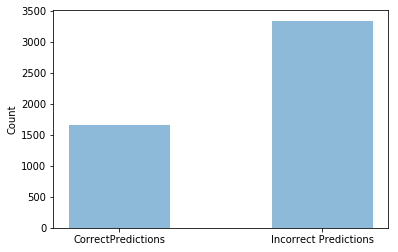

<Figure size 576x1728 with 0 Axes>



Size of Training data:  1000
Accuracay:  62.13999999999999
Confusion Matrix: 
Predicted:
Actual: 
 [[144.   0.   0.   2.   0.   0.   1.   0.   0.   7.   0.   2.   6.   3.
    2.   0.  11.  16.   5.   4.   1.   1.   0.   1.   0.   0.]
 [  0.  90.   0.  24.   0.   1.   0.   0.   2.   0.   0.   0.   0.   0.
    4.   2.  11.  26.  13.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0. 124.   0.   2.   0.   0.   0.   0.   0.   5.   2.   3.   0.
    9.   0.   5.  11.   0.   0.   9.   1.   0.   0.   0.   0.]
 [  0.   2.   0. 194.   0.   0.   0.   0.   0.   0.   0.   0.   0.   5.
    9.   0.   0.   3.   0.   2.   0.   0.   0.   1.   0.   0.]
 [  0.   8.  62.   2.  14.   0.   0.   0.  11.   0.   0.   0.   0.   0.
    0.   7.   7.  27.   3.   4.   0.   0.   0.  46.   0.   0.]
 [  0.   5.   0.   5.   0. 111.   0.   0.   0.   1.   0.   0.   0.   3.
    2.  23.   0.   7.  10.  24.   0.   0.   1.   2.   0.   0.]
 [  0.   1.  60.   2.   0.   0.   6.   0.   0.   0.   0.   2.   2.   0.
   12.   3.  81. 

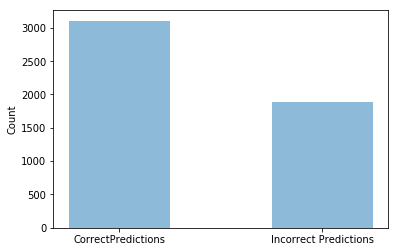

<Figure size 576x1728 with 0 Axes>



Size of Training data:  5000
Accuracay:  59.440000000000005
Confusion Matrix: 
Predicted:
Actual: 
 [[184.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   2.   0.
    0.   0.  10.   0.   5.   0.   2.   0.   0.   0.   3.   0.]
 [  2.  57.   2.   1.   0.   3.   0.   4.   1.   0.   0.   0.   0.   0.
    0.   1.  70.   0.  28.   1.   0.   0.   0.   3.   0.   0.]
 [  2.   0. 143.   0.   0.   0.   2.   0.   0.   0.   2.   0.   2.   0.
    0.   0.  12.   0.   0.   1.   7.   0.   0.   0.   0.   0.]
 [  1.   9.   0. 132.   0.   0.   0.  13.   0.   1.   0.   0.   4.   1.
    9.   2.  13.   0.   1.  18.   3.   0.   0.   6.   0.   3.]
 [  0.   1.  86.   0.  11.   2.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.  40.   0.   9.   3.   0.   0.   0.  35.   0.   4.]
 [  7.   0.   9.   1.   0. 112.   1.   7.   0.   0.   0.   0.   1.   2.
    0.  16.  13.   2.   2.  19.   0.   0.   0.   1.   1.   0.]
 [  2.   0.  85.   0.   0.   1.   0.   1.   0.   0.   0.   0.   1.   0.
    1.   0. 106.

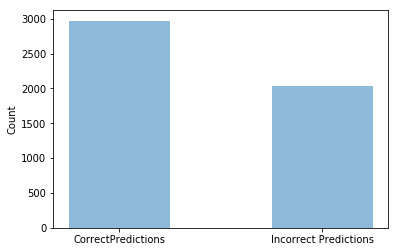

<Figure size 576x1728 with 0 Axes>



Size of Training data:  10000
Accuracay:  57.14
Confusion Matrix: 
Predicted:
Actual: 
 [[179.   0.   0.   0.   0.   0.   0.   0.   0.   0.   1.   0.   3.   0.
    0.   0.   0.   1.  13.   1.   1.   0.   1.   3.   3.   0.]
 [  1. 136.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   1.   0.   4.  29.   0.   0.   0.   0.   2.   0.   0.]
 [  0.   1. 132.   0.   0.   0.   2.   2.   0.   0.   8.   4.   9.   0.
    0.   1.   1.   0.   6.   1.   1.   0.   1.   2.   0.   0.]
 [  1. 149.   0.  23.   0.   0.   0.   4.   0.   0.   0.   0.   7.   1.
    0.   3.   0.   0.  16.   8.   0.   0.   0.   4.   0.   0.]
 [  2.  19.  60.   0.   0.   1.   1.   0.   0.   0.   3.   2.   0.   0.
    0.   0.   1.   9.  35.   1.   0.   0.   0.  57.   0.   0.]
 [  1.  11.  11.   0.   0.  64.   0.   0.   0.   0.   0.   0.   0.   0.
    0.  58.   0.   2.  17.  25.   0.   0.   3.   2.   0.   0.]
 [  4.  11.  84.   0.   0.   0.   9.   1.   0.   0.   3.   6.   2.   0.
    0.   9.  28.   6.  39.  

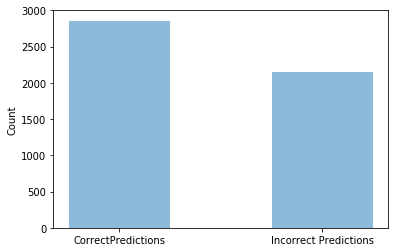

<Figure size 576x1728 with 0 Axes>



Size of Training data:  2000
Accuracay:  64.68
Confusion Matrix: 
Predicted:
Actual: 
 [[166.   0.   0.   1.   0.   0.   1.   0.   0.   4.   2.   0.   3.   0.
    2.   0.   1.   6.  11.   1.   0.   6.   1.   0.   1.   0.]
 [  0. 119.   0.   3.   0.   0.   0.   0.   8.   0.   0.   0.   0.   0.
    0.  14.   0.  16.  11.   0.   0.   2.   0.   0.   0.   0.]
 [  0.   1. 107.   0.  28.   0.   7.   0.   0.   0.   8.   5.   1.   0.
    2.   1.   0.   1.   0.   1.   5.   1.   3.   0.   0.   0.]
 [  0.  19.   0. 158.   9.   0.   1.   0.   2.   2.   0.   1.   2.   0.
    0.   2.   0.   2.   1.   6.   2.   7.   0.   1.   0.   1.]
 [  0.   1.   2.   0. 155.   0.   3.   0.   4.   0.   2.   1.   0.   0.
    0.   5.   0.  12.   4.   1.   0.   0.   0.   1.   0.   0.]
 [  0.   5.   0.   4.   4.  42.   0.   0.   0.   1.   0.   0.   0.   0.
    0.  92.   0.   2.   5.  29.   0.   5.   3.   0.   2.   0.]
 [  0.  12.  51.   0.  16.   0.  69.   0.   5.   0.   3.   7.   2.   0.
    2.   2.  11.  11.   7.   

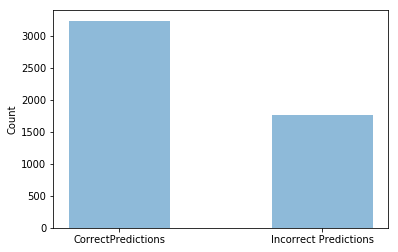

<Figure size 576x1728 with 0 Axes>



Size of Training data:  15000
Accuracay:  62.38
Confusion Matrix: 
Predicted:
Actual: 
 [[172.   1.   0.   0.   0.   0.   0.   0.   0.   1.   1.   0.   1.   1.
    9.   0.   4.   1.   4.   2.   1.   0.   0.   3.   3.   2.]
 [  0. 142.   0.   0.   0.   3.   0.   0.   2.   0.   0.   0.   0.   0.
   19.   0.   0.   6.   0.   1.   0.   0.   0.   0.   0.   0.]
 [  0.   0. 111.   0.  15.   0.   4.   0.   0.   0.   5.   2.   2.   0.
   24.   0.   2.   1.   0.   2.   3.   0.   0.   0.   0.   0.]
 [  0.  91.   0.  27.   1.   0.   0.   0.   1.   0.   0.   0.   0.   5.
   71.   0.   0.   0.   0.  16.   1.   0.   0.   2.   0.   1.]
 [  0.   5.   1.   0. 155.   0.   4.   0.   0.   0.   0.   0.   0.   0.
    2.   0.   3.   7.   1.   5.   0.   0.   0.   8.   0.   0.]
 [  0.   4.   0.   0.   4. 133.   3.   0.   0.   0.   0.   0.   0.   2.
    2.   0.   0.   2.   0.  42.   0.   0.   1.   1.   0.   0.]
 [  0.   6.  35.   0.   7.   3.  49.   0.   1.   0.   0.   5.   1.   0.
   67.   0.  24.   6.   3.  

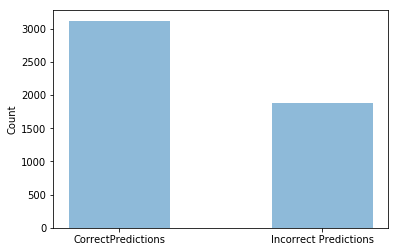

<Figure size 576x1728 with 0 Axes>

In [3]:
def main():

    # Read the data file
    szDatasetPath = './letter-recognition.data' # Put this file in the same place as this script
    listClasses = []
    listAttrs = []
    with open(szDatasetPath) as csvFile:
        csvReader = csv.reader(csvFile, delimiter=',')
        for row in csvReader:
            listClasses.append(row[0])
            listAttrs.append(list(map(float, row[1:])))

    # Generate the mapping from class name to integer IDs
    mapCls2Int = dict([(y, x) for x, y in enumerate(sorted(set(listClasses)))])

    # Store the dataset with numpy array
    dataX = np.array(listAttrs)
    dataY = np.array([mapCls2Int[cls] for cls in listClasses])
    
    # Split the dataset as the training set and test set
    nNumTrainingExamples = 15000
    trainX = dataX[:nNumTrainingExamples, :]
    trainY = dataY[:nNumTrainingExamples]
    testX = dataX[nNumTrainingExamples:, :]
    testY = dataY[nNumTrainingExamples:]
    
    #set containing number of points to use for training pocket and testing knn
    sample = {100, 1000, 2000, 5000, 10000, 15000}
    
    #kNN:
    
    for s in sample:
        #use sample number of points from training data
        train_x = trainX[:s]
        train_y = trainY[:s]
        print("Training data size: ", s)
        #print("Actual Label of first 24 index: ",testY[:24])
        #call knn with a every value of k on every size of training data set
        for k in range (1,10,2):
            #get the prediction labels by calling test_knn
            pred_y = test_knn(train_x, train_y, testX, k)
            #print("Predicted Label of first 24: ",pred_y[:24])
            print("Number of nearest neighbours used: ", k)
            print("Accuracy: ",compute_accuracy(pred_y, testY))
        
        print("\n")
   
    #Pocket:
    epochs = 150
    print("Number of iterations/ epochs for Pocket: ", epochs)
    
    for s in sample: 
        #use sample number of points from training data to generate weight vectors
        train_x = trainX[:s]
        train_y = trainY[:s]
        print("Size of Training data: ", s)
        
        #call train_pocket function to train pocket algorithm and generate weight matrix
        #each row in weight matrix is a weight vector
        weights = train_pocket(train_x, train_y, epochs)
        #test the pocket algorithm to generate predicted Labels
        predictLabel = test_pocket(weights, testX)  
        print("Accuracay: ", compute_accuracy(predictLabel, testY))
        #print the confusion matrix 
        confusion_matrix(predictLabel, testY)
        
        print("\n")
    
    return None

if __name__ == "__main__":
    main()
